Providing the URL (Page 1 and Page 2)


In [9]:
from bs4 import BeautifulSoup
import requests
url1 = 'https://www.haywardhonda.com/inventory/used?paymenttype=cash&instock=true&intransit=true&inproduction=true&page=1'
url2='https://www.haywardhonda.com/inventory/used?paymenttype=cash&instock=true&intransit=true&inproduction=true&page=2'
page1 = requests.get(url1)
page2 = requests.get(url2)
print(page1)
print(page2)

<Response [200]>
<Response [200]>


Parsing the HTML Page

In [10]:
#Combining the html pages
combined_html = page1.text + page2.text
soup = BeautifulSoup(combined_html, 'html.parser')
print(soup)


<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://www.haywardhonda.com/themes/Honda/images/fav-icon.png?v=31" rel="icon" type="image/x-icon"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=6,user-scalable=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="208845" name="dealerID"/>
<meta content="TeamVelocity" name="providerID"/>
<title>Used Cars for Sale in Hayward, CA | Hayward Honda</title>
<meta content="Trying to find a Used car, truck, or SUV for sale in Hayward, CA? We can help! Check out our Used inventory to find the exact one for you." name="description"/>
<link href="https://www.haywardhonda.com/inventory/used?page=1" rel="canonical"/>
<meta content="Used Cars for Sale in Hayward, CA | Hayward Honda" property="og:title"/>
<meta content="Hayward Honda" property="og:site_name"/>
<meta content="Used Cars for Sale in Hayward, CA | Hayward Honda" property="og:description"/>
<script>(fun

Getting the attributes (Interior Color, Engine, Transmission, Mileage, VIN, Stock, Model Code, Drive Train)

In [11]:
#fuel_elements = Engine + Transmission + Mileage + VIN + Stock + Model Code + Drive Train + Interior Color

d_list = []
fuel_elements = soup.find_all('div', class_=["my-1", "ml-1",'mileage'])
for fuel_element in fuel_elements:
    fuel_info = fuel_element.text.replace('Fuel Type:', '').strip()
    d_list.append(fuel_info)
#Removing the First string from the site (Sort)
strings_to_remove = [
    'Sort\n\n\n\nOldest in inventory to newest in inventory\nNewest in inventory to oldest in inventory\nPrice highest to lowest\nPrice lowest to highest\nMileage highest to lowest\nMileage lowest to highest\nYear lowest to highest\nYear highest to lowest\nAlphabetical',
    'Silver'
]

filtered_data = [item for item in d_list if not any(substring in item for substring in strings_to_remove)]
del filtered_data[0]
print(filtered_data)

['Interior:\n\nGray', 'Engine: Regular Unleaded I-4 2.0 L/122', 'Transmission: CVT', 'Mileage: 60,935 Miles', 'VIN: \n5NPD84LF2LH578383', 'Stock: #\n402090R', 'Model Code: #484A2F45', 'DriveTrain: FWD', 'Interior:\n\nBlack/Ivory', 'Engine: Regular Unleaded I-4 2.0 L/122', 'Transmission: CVT', 'Mileage: 81,639 Miles', 'VIN: \n19XFC2F53GE213896', 'Stock: #\n402073', 'Model Code: #FC2F5GEW', 'DriveTrain: FWD', 'Interior:\n\nSport Interior', 'Engine: Regular Unleaded I-4 1.6 L/98', 'Transmission: CVT', 'Mileage: 33,548 Miles', 'VIN: \n3N1CN8FV0ML924370', 'Stock: #\n402111', 'Model Code: #10311', 'DriveTrain: FWD', 'Interior:\n\nCharcoal', 'Engine: Regular Unleaded I-4 2.0 L/122', 'Transmission: CVT', 'Mileage: 67,223 Miles', 'VIN: \nJN1BJ1AW6MW662556', 'Stock: #\n402135R', 'Model Code: #27011', 'DriveTrain: AWD', 'Interior:\n\nBlack', 'Engine: Intercooled Turbo Premium Unleaded I-4 1.5 L/91', 'Transmission: CVT', 'Mileage: 90,155 Miles', 'VIN: \nSHHFK7H40KU420879', 'Stock: #\n402053', 'Mod

Getting the prices of cars

In [12]:
#Now price is our task to add up to the data frame

c= soup.find_all('div', {'class': '', 'style': 'color:#007CC3'})
prices = [div.get_text(strip=True) for div in c]

cleaned_prices = [price.replace('"', '') for price in prices if price]

print(cleaned_prices)

['$15,451', '$15,991', '$17,551', '$17,551', '$17,881', '$17,881', '$17,951', '$17,991', '$17,991', '$18,451', '$18,541', '$18,551', '$18,551', '$19,991', '$19,991', '$19,991', '$21,991', '$22,991', '$22,991', '$23,991', '$24,500', '$24,551', '$24,551', '$25,991', '$25,991', '$25,991', '$26,451', '$26,981', '$27,551', '$27,551', '$27,741', '$27,891', '$27,891', '$27,981', '$28,581', '$28,981', '$28,991', '$28,991', '$30,991', '$33,991', '$36,501']


Getting the car names

In [13]:
#Now car_names is our task to add up to the data frame

names = soup.find_all('div', class_='vehiclebox-title color-black ft-18 font-bold _theme_font_bold')

h2_tags = soup.find_all('div', class_='vehiclebox-title')  # Assuming each vehicle is within a div with this class

# Extract the text content within each h2 tag
vehicle_names = [h2_tag.h2.get_text(strip=True) for h2_tag in h2_tags]
print(vehicle_names)


['2020 Hyundai Elantra SEL', '2016 Honda Civic Sedan 4dr CVT LX', '2021 Nissan Versa SR', '2021 Nissan Rogue Sport S', '2019 Honda Civic Hatchback Sport CVT', '2020 Nissan Kicks SR', '2020 Hyundai Santa Fe SE w/SULEV', '2020 Honda Fit EX CVT', '2020 Kia Forte GT-Line', '2016 Honda Civic Sedan 4dr CVT EX-T', '2019 Honda Civic Hatchback EX CVT', '2018 MAZDA MAZDA3 4-Door Touring', '2021 Toyota Corolla LE', '2020 Toyota Corolla SE', '2021 Nissan Murano SV', '2019 Honda CR-V LX 2WD', '2019 Toyota C-HR Limited', '2021 Honda HR-V EX 2WD CVT', '2021 Honda Civic Sedan LX CVT', '2016 Honda Pilot AWD 4dr EX-L', '2021 Honda Civic Sedan Sport CVT', '2018 Honda Accord Sedan EX-L Navi 2.0T Auto', '2021 Jeep Cherokee Latitude Lux', '2021 GMC Acadia SLE', '2022 Dodge Charger SXT', '2019 Honda CR-V EX 2WD', '2018 Honda Accord Sedan EX-L 2.0T Auto', '2022 Honda Civic Hatchback Sport CVT', '2021 Honda Passport Sport FWD', '2020 Honda CR-V EX-L 2WD', '2023 Honda Accord Sedan EX CVT', '2020 Honda Accord Se

Getting the miles driven by the car

In [14]:
##Now mileage is our task to add up to the data frame

soup.find_all('div',class_='mileage')
mileage_list = [mileage.get_text(strip=True).replace('Mileage: ', '') for mileage in soup.find_all('div', class_='mileage')]

print(mileage_list)

['60,935 Miles', '81,639 Miles', '33,548 Miles', '67,223 Miles', '90,155 Miles', '41,821 Miles', '65,993 Miles', '85,713 Miles', '61,286 Miles', '67,387 Miles', '102,444 Miles', '53,728 Miles', '68,257 Miles', '60,043 Miles', '61,176 Miles', '81,811 Miles', '67,077 Miles', '28,411 Miles', '21,206 Miles', '74,539 Miles', '36,965 Miles', '66,913 Miles', '20,849 Miles', '34,310 Miles', '29,445 Miles', '33,749 Miles', '32,151 Miles', '15,065 Miles', '34,566 Miles', '40,727 Miles', '1,360 Miles', '22,265 Miles', '56,770 Miles', '16,876 Miles', '35,843 Miles', '37,830 Miles', '21,362 Miles', '54,795 Miles', '28,297 Miles', '26,534 Miles', '8,059 Miles', '82,331 Miles']


Creating a pre-processed data frame to check the values

In [15]:
#Creating a Data Frame for the entities 

import pandas as pd

attributes = {
    'Engine': [],
    'Transmission': [],
    'VIN': [],
    'Stock': [],
    'Model Code': [],
    'DriveTrain': [],
    'Interior': [],
    'Mileage' : []
}

# Extract and organize information
for info in d_list:
    if 'Engine' in info or 'Regular' in info or 'Intercooled' in info:  
        attributes['Engine'].append(info)
    elif 'Transmission' in info:
        attributes['Transmission'].append(info)
    elif 'Mileage' in info:
        attributes['Mileage'].append(info)
    elif 'VIN' in info:
        attributes['VIN'].append(info)
    elif 'Stock' in info:
        attributes['Stock'].append(info)
    elif 'Model Code' in info:
        attributes['Model Code'].append(info)
    elif 'DriveTrain' in info:
        attributes['DriveTrain'].append(info)
    elif 'Interior' in info:
        attributes['Interior'].append(info)

# Make sure all lists have the same length by filling missing values with None
max_length = max(len(lst) for lst in attributes.values())
for key in attributes:
    attributes[key] += [None] * (max_length - len(attributes[key]))


# Create a DataFrame
pm = pd.DataFrame(attributes)

# Print the DataFrame
pm

,Engine,Transmission,VIN,Stock,Model Code,DriveTrain,Interior,Mileage
0,Engine: Regular Unleaded I-4 2.0 L/122,Transmission: CVT,VIN: \n5NPD84LF2LH578383,Stock: #\n402090R,Model Code: #484A2F45,DriveTrain: FWD,Interior:\n\nGray,"Mileage: 60,935 Miles"
1,Engine: Regular Unleaded I-4 2.0 L/122,Transmission: CVT,VIN: \n19XFC2F53GE213896,Stock: #\n402073,Model Code: #FC2F5GEW,DriveTrain: FWD,Interior:\n\nBlack/Ivory,"Mileage: 81,639 Miles"
2,Engine: Regular Unleaded I-4 1.6 L/98,Transmission: CVT,VIN: \n3N1CN8FV0ML924370,Stock: #\n402111,Model Code: #10311,DriveTrain: FWD,Interior:\n\nSport Interior,"Mileage: 33,548 Miles"
3,Engine: Regular Unleaded I-4 2.0 L/122,Transmission: CVT,VIN: \nJN1BJ1AW6MW662556,Stock: #\n402135R,Model Code: #27011,DriveTrain: AWD,Interior:\n\nCharcoal,"Mileage: 67,223 Miles"
4,Engine: Intercooled Turbo Premium Unleaded I-4...,Transmission: CVT,VIN: \nSHHFK7H40KU420879,Stock: #\n402053,Model Code: #FK7H4KEW,DriveTrain: FWD,Interior:\n\nBlack,"Mileage: 90,155 Miles"
5,Engine: Regular Unleaded I-4 1.6 L/98,Transmission: CVT,VIN: \n3N1CP5DV0LL536016,Stock: #\n402112,Model Code: #21210,DriveTrain: FWD,Interior:\n\nCharcoal,"Mileage: 41,821 Miles"
6,Engine: Regular Unleaded I-4 2.4 L/144,Transmission: Automatic,VIN: \n5NMS23AD8LH262777,Stock: #\n402035,Model Code: #64412F4S,DriveTrain: FWD,Interior:\n\nBlack/Black,"Mileage: 65,993 Miles"
7,Engine: Regular Unleaded I-4 1.5 L/91,Transmission: CVT,VIN: \n3HGGK5H84LM705905,Stock: #\n402051,Model Code: #GK5H8LJW,DriveTrain: FWD,Interior:\n\nBlack,"Mileage: 85,713 Miles"
8,Engine: Regular Unleaded I-4 2.0 L/122,Transmission: CVT,VIN: \n3KPF34AD2LE228779,Stock: #\n402107,Model Code: #C3452,DriveTrain: FWD,Interior:\n\nBlack,"Mileage: 61,286 Miles"
9,Engine: Intercooled Turbo Regular Unleaded I-4...,Transmission: CVT,VIN: \n19XFC1F39GE204645,Stock: #\n402089,Model Code: #FC1F3GJW,DriveTrain: FWD,Interior:\n\nBlack,"Mileage: 67,387 Miles"


Removing all the unwanted stuff (cleaning) and giving null for missing values

In [10]:
#Cleaning and assigning the whole data into a single variable (final stuff to add up)
import numpy as np

gas_data = attributes['Engine']
gas_data = [engine.replace('Engine: ', '') for engine in gas_data]
#gas_data

transmission_data = attributes['Transmission']
transmission_data = [transmission.replace('Transmission: ','') for transmission in transmission_data ]
#transmission_data

vin_data = attributes['VIN']
vin_data = [vin.replace('VIN: ', '').replace('\n', '') for vin in vin_data]
#vin_data

stock_data = attributes['Stock']
stock_data = [stock.replace('Stock: ', '').replace('#\n', '') for stock in stock_data]
#stock_data

driveTrain_data = attributes['DriveTrain']
driveTrain_data = [drive.replace('DriveTrain:','') for drive in driveTrain_data]
#driveTrain_data

interior_data = attributes['Interior']
interior_data = [interior.replace('Interior:', ' ').replace('\n\n', '') if interior is not None else None for interior in interior_data]
#interior_data

c = soup.find_all('div', {'class': '', 'style': 'color:#007CC3'})
prices = [div.get_text(strip=True).replace('$', '').replace(',', '') for div in c]
price_series = [int(price) for price in prices if price] #replce with price_series if if you have null values in price
cleaned_prices = pd.Series(price_series + [np.nan] * (max_length - len(price_series)), index=range(max_length))
#print(cleaned_prices)


soup.find_all('div',class_='mileage')
mileage_list = [int(mileage.get_text(strip=True).replace('Mileage: ', '').replace(' Miles', '').replace(',', '')) for mileage in soup.find_all('div', class_='mileage')]
#print(mileage_list)



names = soup.find_all('div', class_='vehiclebox-title color-black ft-18 font-bold _theme_font_bold')
h2_tags = soup.find_all('div', class_='vehiclebox-title')  
vehicle_names = [h2_tag.h2.get_text(strip=True) for h2_tag in h2_tags]
#print(vehicle_names)



Creating a Final Data Frame and exporting to CSV

In [11]:
#Merge all data to the data frame called final_df

import pandas as pd

data = { 'VehicleName': vehicle_names, 'Price($)': cleaned_prices,'Mileage(Miles)': mileage_list,'Engine': gas_data,'Transmission': transmission_data,
        'DriveTrain': driveTrain_data,'VIN': vin_data,'Stock': stock_data,'Interior': interior_data}

#Export the final data frame to csv
final_df = pd.DataFrame(data)
final_df.to_csv('venu_project.csv', index=False)

In [12]:
final_df

,VehicleName,Price($),Mileage(Miles),Engine,Transmission,DriveTrain,VIN,Stock,Interior
0,2020 Hyundai Elantra SEL,15451,60935,Regular Unleaded I-4 2.0 L/122,CVT,FWD,5NPD84LF2LH578383,402090R,Gray
1,2016 Honda Civic Sedan 4dr CVT LX,15991,81639,Regular Unleaded I-4 2.0 L/122,CVT,FWD,19XFC2F53GE213896,402073,Black/Ivory
2,2020 Hyundai Santa Fe SE w/SULEV,17551,65993,Regular Unleaded I-4 2.4 L/144,Automatic,FWD,5NMS23AD8LH262777,402035,Black/Black
3,2021 Nissan Versa SR,17551,33548,Regular Unleaded I-4 1.6 L/98,CVT,FWD,3N1CN8FV0ML924370,402111,Sport Interior
4,2021 Nissan Rogue Sport S,17551,67221,Regular Unleaded I-4 2.0 L/122,CVT,AWD,JN1BJ1AW6MW662556,402135R,Charcoal
5,2019 Honda Civic Hatchback Sport CVT,17881,90155,Intercooled Turbo Premium Unleaded I-4 1.5 L/91,CVT,FWD,SHHFK7H40KU420879,402053,Black
6,2020 Nissan Kicks SR,17991,41821,Regular Unleaded I-4 1.6 L/98,CVT,FWD,3N1CP5DV0LL536016,402112,Charcoal
7,2020 Honda Fit EX CVT,17991,85713,Regular Unleaded I-4 1.5 L/91,CVT,FWD,3HGGK5H84LM705905,402051,Black
8,2020 Kia Forte GT-Line,17991,61286,Regular Unleaded I-4 2.0 L/122,CVT,FWD,3KPF34AD2LE228779,402107,Black
9,2016 Honda Civic Sedan 4dr CVT EX-T,18451,67387,Intercooled Turbo Regular Unleaded I-4 1.5 L/91,CVT,FWD,19XFC1F39GE204645,402089,Black


# Analysis

Data Visualization

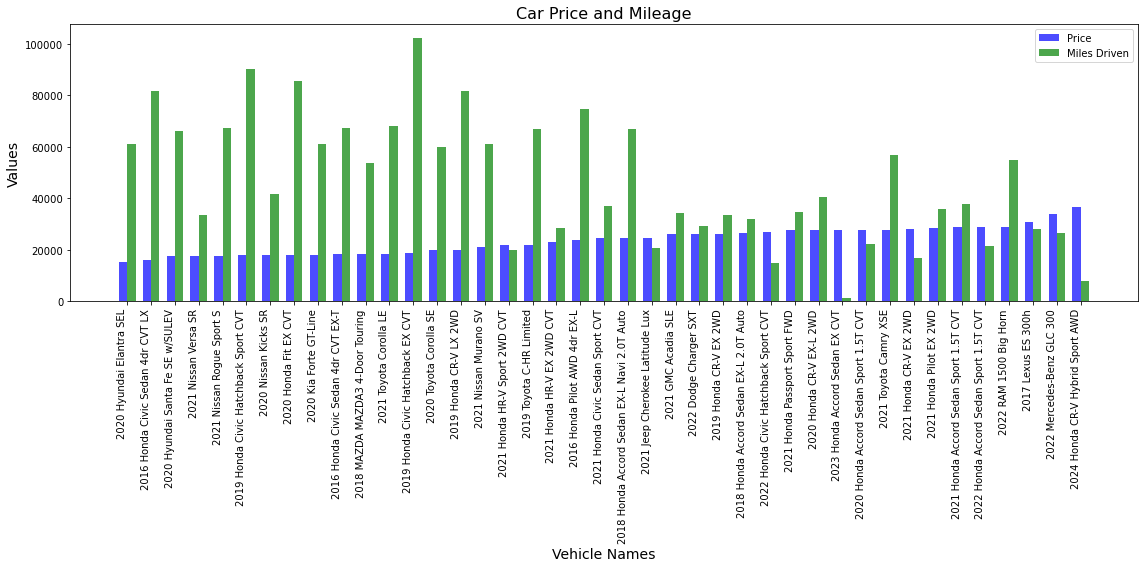

Descriptive Statistics:
              Price        Mileage
count     41.000000      41.000000
mean   23679.024390   47018.682927
std     5209.105492   24453.965674
min    15451.000000    1360.000000
25%    18551.000000   28411.000000
50%    24500.000000   40727.000000
75%    27741.000000   66913.000000
max    36501.000000  102444.000000

Correlation Analysis:
           Price  Mileage
Price    1.00000 -0.69144
Mileage -0.69144  1.00000


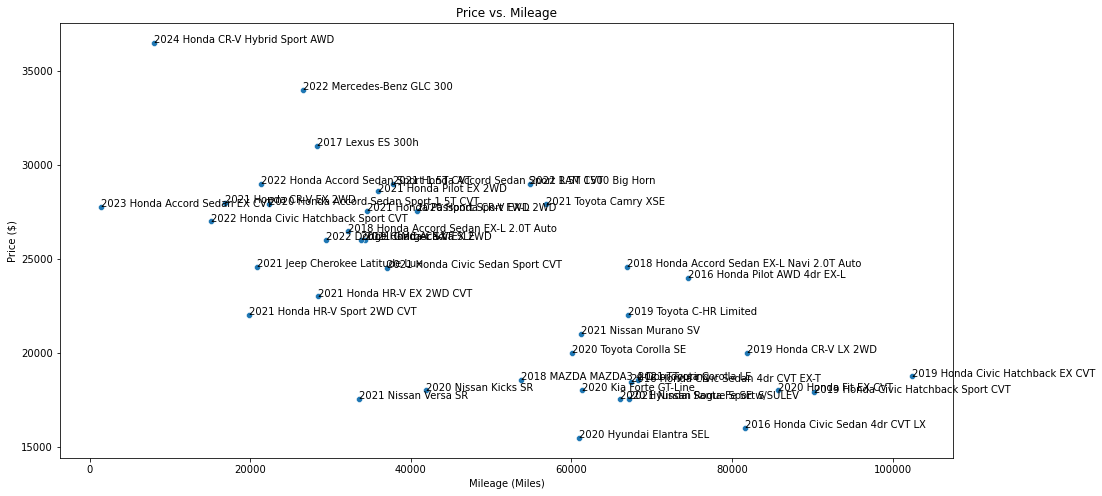

In [13]:
#Analysis part for the best car which has less miles driven with a afordable price (best priced car)


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = {
    'VehicleName' : vehicle_names ,
    'Price' : cleaned_prices ,
    'Mileage' : mileage_list
}
# Create a DataFrame
df = pd.DataFrame(data)

# Plotting bar chart for Price and Mileage
plt.figure(figsize=(16, 8))
bar_width = 0.35
bar_positions = range(len(df['VehicleName']))

plt.bar(bar_positions, df['Price'], width=bar_width, color='b', alpha=0.7, label='Price')
plt.bar([pos + bar_width for pos in bar_positions], df['Mileage'], width=bar_width, color='g', alpha=0.7, label='Miles Driven')

plt.xlabel('Vehicle Names', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Car Price and Mileage', fontsize=16)
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df['VehicleName'], rotation=90, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

cf = pd.DataFrame(data)

# Descriptive statistics
print("Descriptive Statistics:")
print(cf.describe())

# Correlation analysis
print("\nCorrelation Analysis:")
print(cf[['Price', 'Mileage']].corr())


# Scatter plot of Price vs. Mileage
plt.figure(figsize=(16, 8))
sns.scatterplot(data=cf, x='Mileage', y='Price')
for i in range(len(cf)):
    plt.annotate(cf['VehicleName'][i], (cf['Mileage'][i], cf['Price'][i]))
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (Miles)')
plt.ylabel('Price ($)')
plt.show()
#the correlation coefficient of approximately -ve suggests a moderate negative 
#correlation between price and mileage, indicating that there is some tendency for prices to 
#decrease as mileage increases, but the relationship is not extremely strong.

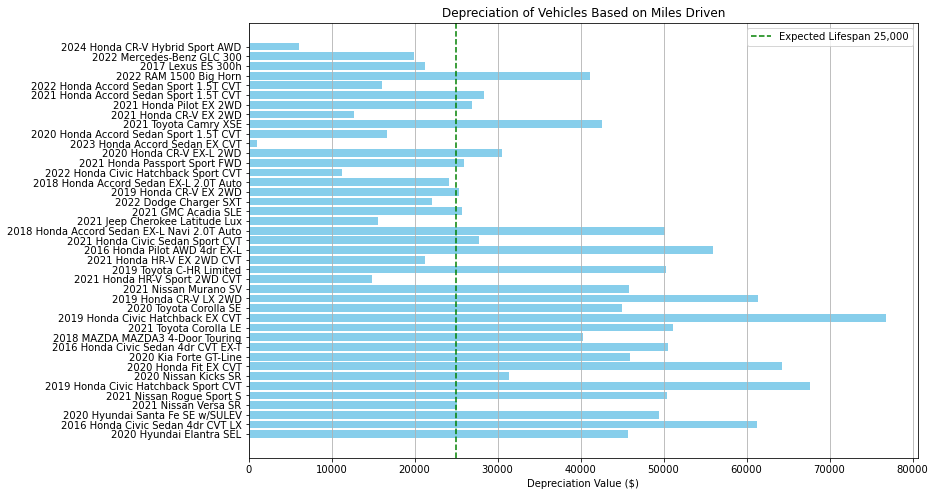

In [17]:
#Deprciation
#Assumptions are made for average life span and intial cost

average_lifespan = 60000  # in miles
initial_cost = 45000  # in dollars

# Calculate depreciation for each vehicle
depreciation_values = [
    (mileage / average_lifespan) * initial_cost for mileage in mileage_list
]

plt.figure(figsize=(12, 8))
plt.barh(vehicle_names, depreciation_values, color='skyblue')
plt.axvline(x=25000, color='green', linestyle='--', label='Expected Lifespan 25,000')
plt.xlabel('Depreciation Value ($)')
plt.title('Depreciation of Vehicles Based on Miles Driven')
plt.legend()
plt.grid(axis='x')

# Show the plot
plt.show()




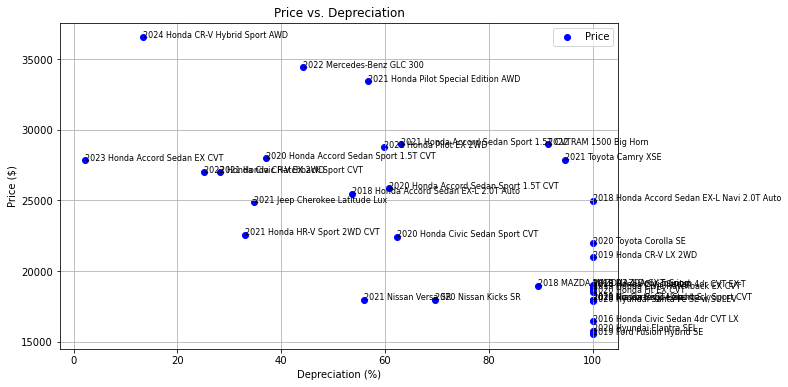

In [13]:
#Further analysis with comapring deprciation and prices of vehicles

import matplotlib.pyplot as plt

# Deprciation
average_lifespan = 60000  # in miles
initial_cost = 45000  # in dollars

# Calculate depreciation for each vehicle
depreciation_values = [
    min((mileage / average_lifespan) * initial_cost, initial_cost) for mileage in mileage_list
]

# Convert depreciation to percentage
depreciation_percentages = [(depreciation / initial_cost) * 100 for depreciation in depreciation_values]

plt.figure(figsize=(10, 6))

# Plotting price against depreciation
plt.scatter(depreciation_percentages, cleaned_prices , color='blue', label='Price')

# Adding labels and title
plt.xlabel('Depreciation (%)')
plt.ylabel('Price ($)')
plt.title('Price vs. Depreciation')
plt.grid(True)

for i, vehicle in enumerate(vehicle_names):
    plt.annotate(vehicle, (depreciation_percentages[i], cleaned_prices[i]), fontsize=8)

# Show the plot
plt.legend()
plt.show()
